Importing Libraries

In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.compose import ColumnTransformer
from sklearn.pipeline import Pipeline
from sklearn.model_selection import train_test_split, learning_curve, RandomizedSearchCV
from sklearn.preprocessing import OneHotEncoder, StandardScaler
from sklearn.experimental import enable_iterative_imputer
from sklearn.impute import IterativeImputer
from sklearn.ensemble import RandomForestClassifier , RandomForestRegressor
from lightgbm import LGBMClassifier
from sklearn.metrics import classification_report, confusion_matrix
from sklearn.linear_model import LinearRegression
from sklearn.neighbors import KNeighborsRegressor

/usr/local/lib/python3.10/dist-packages/dask/dataframe/__init__.py:42: FutureWarning: 
Dask dataframe query planning is disabled because dask-expr is not installed.

You can install it with `pip install dask[dataframe]` or `conda install dask`.
This will raise in a future version.

  warnings.warn(msg, FutureWarning)


Load the Dataset

In [ ]:

df = pd.read_csv('/content/credit_risk_dataset.csv')
df.head()


,person_age,person_income,person_home_ownership,person_emp_length,loan_intent,loan_grade,loan_amnt,loan_int_rate,loan_status,loan_percent_income,cb_person_default_on_file,cb_person_cred_hist_length
0,22,59000,RENT,123.0,PERSONAL,D,35000,16.02,1,0.59,Y,3
1,21,9600,OWN,5.0,EDUCATION,B,1000,11.14,0,0.10,N,2
2,25,9600,MORTGAGE,1.0,MEDICAL,C,5500,12.87,1,0.57,N,3
3,23,65500,RENT,4.0,MEDICAL,C,35000,15.23,1,0.53,N,2
4,24,54400,RENT,8.0,MEDICAL,C,35000,14.27,1,0.55,Y,4


Visualizing the Raw Data

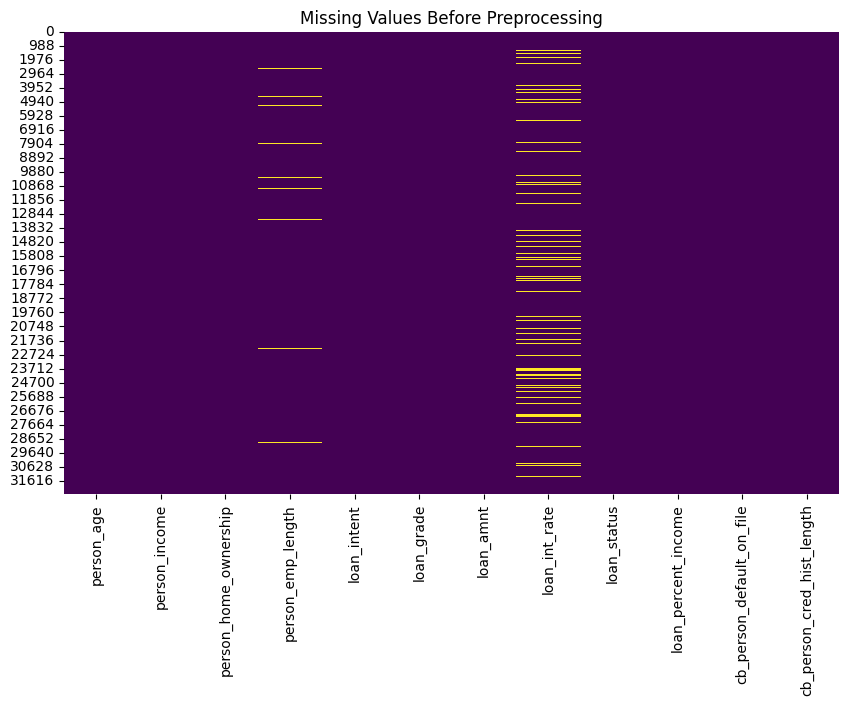

In [ ]:
def visualize_raw_data(df):
    plt.figure(figsize=(10, 6))
    sns.heatmap(df.isnull(), cbar=False, cmap='viridis')
    plt.title('Missing Values Before Preprocessing')
    plt.show()

visualize_raw_data(df)

In [ ]:
dups = df.duplicated()
print(f"Duplicate records: {df[dups]}")
df.query("person_age==23 & person_income==90000 & person_home_ownership == 'MORTGAGE' & loan_int_rate == 10.36")
print(f"Initial Shape: {df.shape}")

Duplicate records: Empty DataFrame
Columns: [person_age, person_income, person_home_ownership, person_emp_length, loan_intent, loan_grade, loan_amnt, loan_int_rate, loan_status, loan_percent_income, cb_person_default_on_file, cb_person_cred_hist_length]
Index: []
Initial Shape: (32416, 12)


In [ ]:
df.drop_duplicates(inplace=True)
print(f"Shape after dropping duplicates: {df.shape}")

Shape after dropping duplicates: (32416, 12)


In [ ]:
num_cols = df.select_dtypes(include=['number']).columns
cat_cols = df.select_dtypes(exclude=['number']).columns

In [ ]:
df[num_cols] = df[num_cols].fillna(df[num_cols].median())


In [ ]:
df[cat_cols] = df[cat_cols].fillna(df[cat_cols].mode().iloc[0])


In [ ]:
print("missing values check",df.isnull().sum())

missing values check person_age                    0
person_income                 0
person_home_ownership         0
person_emp_length             0
loan_intent                   0
loan_grade                    0
loan_amnt                     0
loan_int_rate                 0
loan_status                   0
loan_percent_income           0
cb_person_default_on_file     0
cb_person_cred_hist_length    0
dtype: int64


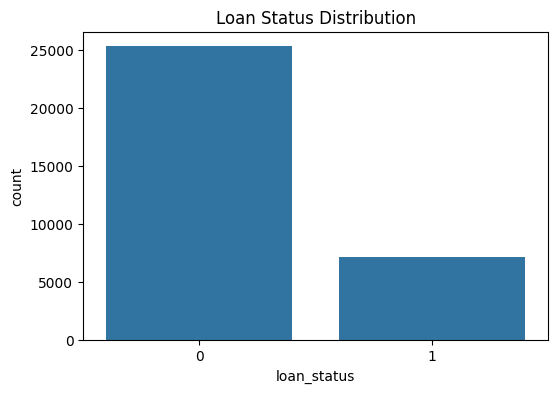

In [ ]:
plt.figure(figsize=(6,4))
sns.countplot(data=df, x='loan_status')
plt.title('Loan Status Distribution')
plt.show()

In [ ]:
df['income_to_loan_ratio'] = df['person_income'] / df['loan_amnt']


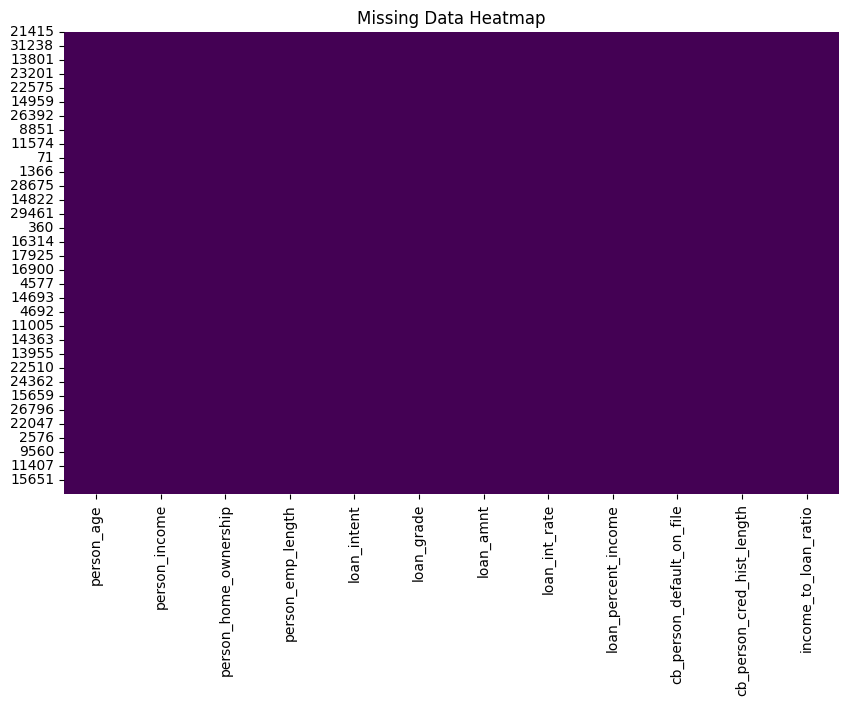

In [ ]:
plt.figure(figsize=(10,6))
sns.heatmap(X.isna(), cbar=False, cmap='viridis')
plt.title("Missing Data Heatmap")
plt.show()

In [ ]:
from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import RandomForestClassifier
from lightgbm import LGBMClassifier
from sklearn.metrics import classification_report, confusion_matrix, roc_curve, roc_auc_score, precision_recall_curve
from sklearn.model_selection import train_test_split, cross_val_score, GridSearchCV
from sklearn.pipeline import Pipeline
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np
from sklearn.preprocessing import StandardScaler, OneHotEncoder
from sklearn.impute import SimpleImputer
from sklearn.compose import ColumnTransformer


In [ ]:
num_cols = [col for col in X.columns if X[col].dtype != 'O']
cat_cols = [col for col in X.columns if X[col].dtype == 'O']

In [ ]:
num_pipeline = Pipeline([
    ('imputer', SimpleImputer(strategy='median')),
    ('scaler', StandardScaler())
])

In [ ]:
cat_pipeline = Pipeline([
    ('imputer', SimpleImputer(strategy='most_frequent')),
    ('onehot', OneHotEncoder(handle_unknown='ignore'))
])

In [ ]:
preprocessor = ColumnTransformer([
    ('num', num_pipeline, num_cols),
    ('cat', cat_pipeline, cat_cols)
])

In [ ]:
from sklearn.ensemble import RandomForestClassifier
rf_model = RandomForestClassifier(random_state=42)
rf_pipeline = Pipeline([
    ('preprocessor', preprocessor),
    ('model', rf_model)
])

In [ ]:
from lightgbm import LGBMClassifier
lgbm_model = LGBMClassifier(random_state=42)
lgbm_pipeline = Pipeline([
    ('preprocessor', preprocessor),
    ('model', lgbm_model)
])


In [ ]:
from sklearn.linear_model import LogisticRegression
lr_model = LogisticRegression(random_state=42, max_iter=1000)
lr_pipeline = Pipeline([
    ('preprocessor', preprocessor),
    ('model', lr_model)
])


In [ ]:
def create_model_pipeline(model):
    return Pipeline([
        ('preprocessor', preprocessor),
        ('model', model)
    ])

In [ ]:
t

In [ ]:

rf_pipeline = create_model_pipeline(RandomForestClassifier(random_state=42))

lgbm_pipeline = create_model_pipeline(LGBMClassifier(random_state=42))

lr_pipeline = create_model_pipeline(LogisticRegression(random_state=42, max_iter=1000))


In [ ]:
rf_pipeline

Pipeline(steps=[('preprocessor',
                 ColumnTransformer(transformers=[('num',
                                                  Pipeline(steps=[('imputer',
                                                                   SimpleImputer(strategy='median')),
                                                                  ('scaler',
                                                                   StandardScaler())]),
                                                  ['person_age',
                                                   'person_income',
                                                   'person_emp_length',
                                                   'loan_amnt', 'loan_int_rate',
                                                   'loan_percent_income',
                                                   'cb_person_cred_hist_length',
                                                   'income_to_loan_ratio']),
                                                 ('cat',
                                                  Pipeline(steps=[('imputer',
                                                                   SimpleImputer(strategy='most_frequent')),
                                                                  ('onehot',
                                                                   OneHotEncoder(handle_unknown='ignore'))]),
                                                  ['person_home_ownership',
                                                   'loan_intent', 'loan_grade',
                                                   'cb_person_default_on_file'])])),
                ('model', RandomForestClassifier(random_state=42))])

In [ ]:
lgbm_pipeline

Pipeline(steps=[('preprocessor',
                 ColumnTransformer(transformers=[('num',
                                                  Pipeline(steps=[('imputer',
                                                                   SimpleImputer(strategy='median')),
                                                                  ('scaler',
                                                                   StandardScaler())]),
                                                  ['person_age',
                                                   'person_income',
                                                   'person_emp_length',
                                                   'loan_amnt', 'loan_int_rate',
                                                   'loan_percent_income',
                                                   'cb_person_cred_hist_length',
                                                   'income_to_loan_ratio']),
                                                 ('cat',
                                                  Pipeline(steps=[('imputer',
                                                                   SimpleImputer(strategy='most_frequent')),
                                                                  ('onehot',
                                                                   OneHotEncoder(handle_unknown='ignore'))]),
                                                  ['person_home_ownership',
                                                   'loan_intent', 'loan_grade',
                                                   'cb_person_default_on_file'])])),
                ('model', LGBMClassifier(random_state=42))])

In [ ]:
lr_pipeline

Pipeline(steps=[('preprocessor',
                 ColumnTransformer(transformers=[('num',
                                                  Pipeline(steps=[('imputer',
                                                                   SimpleImputer(strategy='median')),
                                                                  ('scaler',
                                                                   StandardScaler())]),
                                                  ['person_age',
                                                   'person_income',
                                                   'person_emp_length',
                                                   'loan_amnt', 'loan_int_rate',
                                                   'loan_percent_income',
                                                   'cb_person_cred_hist_length',
                                                   'income_to_loan_ratio']),
                                                 ('cat',
                                                  Pipeline(steps=[('imputer',
                                                                   SimpleImputer(strategy='most_frequent')),
                                                                  ('onehot',
                                                                   OneHotEncoder(handle_unknown='ignore'))]),
                                                  ['person_home_ownership',
                                                   'loan_intent', 'loan_grade',
                                                   'cb_person_default_on_file'])])),
                ('model', LogisticRegression(max_iter=1000, random_state=42))])

In [ ]:
from sklearn.model_selection import cross_val_score
import numpy as np
pipelines = {
    "Random Forest": rf_pipeline,
    "LightGBM": lgbm_pipeline,
    "Logistic Regression": lr_pipeline
}

for model_name, pipeline in pipelines.items():
    print(f"Training and evaluating {model_name}...")
    scores = cross_val_score(pipeline, X, y, cv=5, scoring='accuracy')
    print(f"{model_name} - Accuracy: {np.mean(scores):.4f} (+/- {np.std(scores):.4f})")


Training and evaluating Random Forest...
Random Forest - Accuracy: 0.9331 (+/- 0.0022)
Training and evaluating LightGBM...
[LightGBM] [Info] Number of positive: 4537, number of negative: 16208
[LightGBM] [Info] Auto-choosing row-wise multi-threading, the overhead of testing was 0.002105 seconds.
You can set `force_row_wise=true` to remove the overhead.
And if memory is not enough, you can set `force_col_wise=true`.
[LightGBM] [Info] Total Bins 1221
[LightGBM] [Info] Number of data points in the train set: 20745, number of used features: 27
[LightGBM] [Info] [binary:BoostFromScore]: pavg=0.218703 -> initscore=-1.273239
[LightGBM] [Info] Start training from score -1.273239
[LightGBM] [Info] Number of positive: 4536, number of negative: 16209
[LightGBM] [Info] Auto-choosing row-wise multi-threading, the overhead of testing was 0.001696 seconds.
You can set `force_row_wise=true` to remove the overhead.
And if memory is not enough, you can set `force_col_wise=true`.
[LightGBM] [Info] Total 

In [ ]:
rf_param_grid = {
    'model__n_estimators': [100, 200],
    'model__max_depth': [10, 20],
    'model__min_samples_split': [5, 10]
}


In [ ]:
from sklearn.model_selection import RandomizedSearchCV

rf_random_search = RandomizedSearchCV(
    rf_pipeline, rf_param_grid, n_iter=10, cv=5, scoring='accuracy', n_jobs=-1, random_state=42
)
rf_random_search.fit(X, y)
print(f"Best parameters for Random Forest: {rf_random_search.best_params_}")


/usr/local/lib/python3.10/dist-packages/sklearn/model_selection/_search.py:320: UserWarning: The total space of parameters 8 is smaller than n_iter=10. Running 8 iterations. For exhaustive searches, use GridSearchCV.
  warnings.warn(


Best parameters for Random Forest: {'model__n_estimators': 200, 'model__min_samples_split': 10, 'model__max_depth': 20}


In [ ]:
rf_grid_search = GridSearchCV(rf_pipeline, rf_param_grid, cv=3, scoring='accuracy', n_jobs=-1)
rf_grid_search.fit(X, y)


GridSearchCV(cv=3,
             estimator=Pipeline(steps=[('preprocessor',
                                        ColumnTransformer(transformers=[('num',
                                                                         Pipeline(steps=[('imputer',
                                                                                          SimpleImputer(strategy='median')),
                                                                                         ('scaler',
                                                                                          StandardScaler())]),
                                                                         ['person_age',
                                                                          'person_income',
                                                                          'person_emp_length',
                                                                          'loan_amnt',
                                                                          'loan_int_rate',
                                                                          'loan_percent_income',
                                                                          'cb_person_cred_hist_length',
                                                                          'income_to_loan_ratio']),
                                                                        ('cat'...
                                                                                          SimpleImputer(strategy='most_frequent')),
                                                                                         ('onehot',
                                                                                          OneHotEncoder(handle_unknown='ignore'))]),
                                                                         ['person_home_ownership',
                                                                          'loan_intent',
                                                                          'loan_grade',
                                                                          'cb_person_default_on_file'])])),
                                       ('model',
                                        RandomForestClassifier(random_state=42))]),
             n_jobs=-1,
             param_grid={'model__max_depth': [10, 20],
                         'model__min_samples_split': [5, 10],
                         'model__n_estimators': [100, 200]},
             scoring='accuracy')

Random Forest Classification Report:
               precision    recall  f1-score   support

           0       0.94      1.00      0.97      4053
           1       0.99      0.76      0.86      1134

    accuracy                           0.95      5187
   macro avg       0.96      0.88      0.91      5187
weighted avg       0.95      0.95      0.94      5187



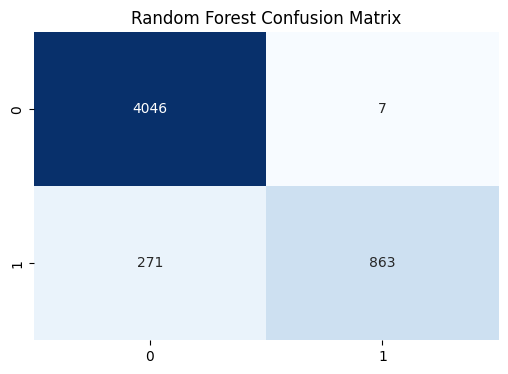

In [ ]:
from sklearn.metrics import classification_report, confusion_matrix
best_rf_model = rf_grid_search.best_estimator_
rf_preds = best_rf_model.predict(X_test)
print("Random Forest Classification Report:\n", classification_report(y_test, rf_preds))
import seaborn as sns
import matplotlib.pyplot as plt

plt.figure(figsize=(6, 4))
sns.heatmap(confusion_matrix(y_test, rf_preds), annot=True, fmt='d', cmap='Blues', cbar=False)
plt.title("Random Forest Confusion Matrix")
plt.show()


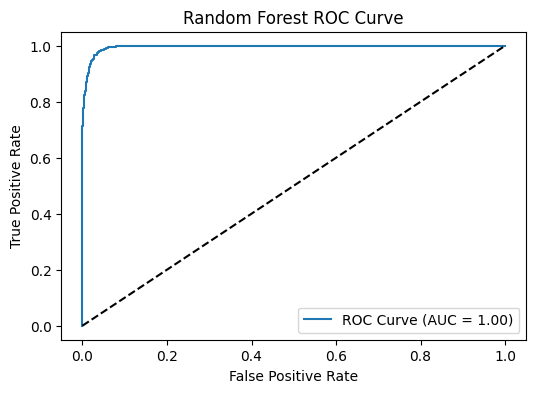

In [ ]:
from sklearn.metrics import roc_curve, roc_auc_score, precision_recall_curve
rf_prob = best_rf_model.predict_proba(X_test)[:, 1]
fpr, tpr, _ = roc_curve(y_test, rf_prob)
auc = roc_auc_score(y_test, rf_prob)

plt.figure(figsize=(6, 4))
plt.plot(fpr, tpr, label=f'ROC Curve (AUC = {auc:.2f})')
plt.plot([0, 1], [0, 1], 'k--')
plt.title("Random Forest ROC Curve")
plt.xlabel("False Positive Rate")
plt.ylabel("True Positive Rate")
plt.legend()
plt.show()


#LightGBM: Hyperparameter Tuning and Evaluation

In [ ]:

lgbm_param_grid = {
    'model__learning_rate': [0.01, 0.1, 0.3],
    'model__max_depth': [5, 10, 15],
    'model__n_estimators': [100, 200, 500]
}

lgbm_grid_search = GridSearchCV(lgbm_pipeline, lgbm_param_grid, cv=3, scoring='accuracy', n_jobs=-1)
lgbm_grid_search.fit(X, y)




[LightGBM] [Info] Number of positive: 5671, number of negative: 20261
[LightGBM] [Info] Auto-choosing row-wise multi-threading, the overhead of testing was 0.003032 seconds.
You can set `force_row_wise=true` to remove the overhead.
And if memory is not enough, you can set `force_col_wise=true`.
[LightGBM] [Info] Total Bins 1227
[LightGBM] [Info] Number of data points in the train set: 25932, number of used features: 27
[LightGBM] [Info] [binary:BoostFromScore]: pavg=0.218687 -> initscore=-1.273332
[LightGBM] [Info] Start training from score -1.273332


GridSearchCV(cv=3,
             estimator=Pipeline(steps=[('preprocessor',
                                        ColumnTransformer(transformers=[('num',
                                                                         Pipeline(steps=[('imputer',
                                                                                          SimpleImputer(strategy='median')),
                                                                                         ('scaler',
                                                                                          StandardScaler())]),
                                                                         ['person_age',
                                                                          'person_income',
                                                                          'person_emp_length',
                                                                          'loan_amnt',
                                                                          'loan_int_rate',
                                                                          'loan_percent_income',
                                                                          'cb_person_cred_hist_length',
                                                                          'income_to_loan_ratio']),
                                                                        ('cat'...
                                                                                          SimpleImputer(strategy='most_frequent')),
                                                                                         ('onehot',
                                                                                          OneHotEncoder(handle_unknown='ignore'))]),
                                                                         ['person_home_ownership',
                                                                          'loan_intent',
                                                                          'loan_grade',
                                                                          'cb_person_default_on_file'])])),
                                       ('model',
                                        LGBMClassifier(random_state=42))]),
             n_jobs=-1,
             param_grid={'model__learning_rate': [0.01, 0.1, 0.3],
                         'model__max_depth': [5, 10, 15],
                         'model__n_estimators': [100, 200, 500]},
             scoring='accuracy')

In [ ]:
print(f"Best parameters for LightGBM: {lgbm_grid_search.best_params_}")

Best parameters for LightGBM: {'model__learning_rate': 0.1, 'model__max_depth': 15, 'model__n_estimators': 200}


LightGBM Classification Report:
               precision    recall  f1-score   support

           0       0.94      1.00      0.97      4053
           1       1.00      0.79      0.88      1134

    accuracy                           0.95      5187
   macro avg       0.97      0.89      0.92      5187
weighted avg       0.95      0.95      0.95      5187



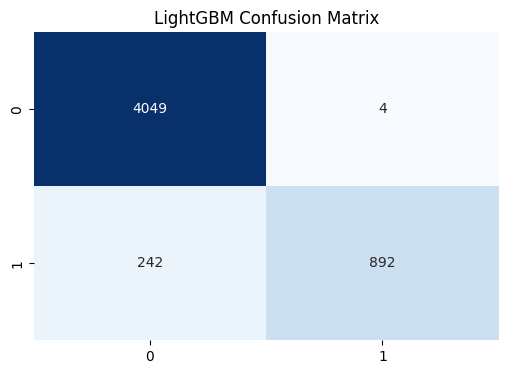

In [ ]:

best_lgbm_model = lgbm_grid_search.best_estimator_
lgbm_preds = best_lgbm_model.predict(X_test)

print("LightGBM Classification Report:\n", classification_report(y_test, lgbm_preds))

plt.figure(figsize=(6, 4))
sns.heatmap(confusion_matrix(y_test, lgbm_preds), annot=True, fmt='d', cmap='Blues', cbar=False)
plt.title("LightGBM Confusion Matrix")
plt.show()



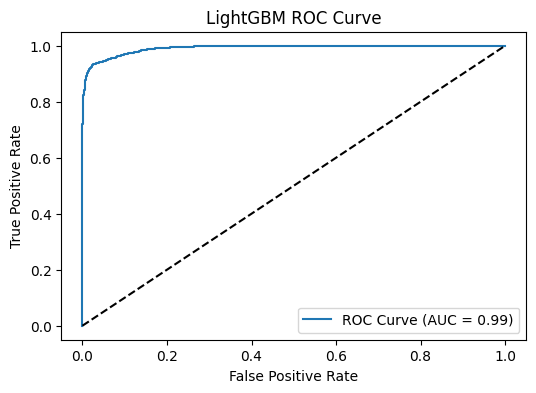

In [ ]:

lgbm_prob = best_lgbm_model.predict_proba(X_test)[:, 1]
fpr, tpr, _ = roc_curve(y_test, lgbm_prob)
auc = roc_auc_score(y_test, lgbm_prob)

plt.figure(figsize=(6, 4))
plt.plot(fpr, tpr, label=f'ROC Curve (AUC = {auc:.2f})')
plt.plot([0, 1], [0, 1], 'k--')
plt.title("LightGBM ROC Curve")
plt.xlabel("False Positive Rate")
plt.ylabel("True Positive Rate")
plt.legend()
plt.show()


#Logistic Regression: Hyperparameter Tuning and Evaluation

In [ ]:

lr_param_grid = {
    'model__C': [0.01, 0.1, 1, 10],
    'model__solver': ['lbfgs', 'liblinear']
}

lr_grid_search = GridSearchCV(lr_pipeline, lr_param_grid, cv=5, scoring='accuracy', n_jobs=-1)
lr_grid_search.fit(X, y)




GridSearchCV(cv=5,
             estimator=Pipeline(steps=[('preprocessor',
                                        ColumnTransformer(transformers=[('num',
                                                                         Pipeline(steps=[('imputer',
                                                                                          SimpleImputer(strategy='median')),
                                                                                         ('scaler',
                                                                                          StandardScaler())]),
                                                                         ['person_age',
                                                                          'person_income',
                                                                          'person_emp_length',
                                                                          'loan_amnt',
                                                                          'loan_int_rate',
                                                                          'loan_percent_income',
                                                                          'cb_person_cred_hist_length',
                                                                          'income_to_loan_ratio']),
                                                                        ('cat',
                                                                         Pipeline(steps=[('imputer',
                                                                                          SimpleImputer(strategy='most_frequent')),
                                                                                         ('onehot',
                                                                                          OneHotEncoder(handle_unknown='ignore'))]),
                                                                         ['person_home_ownership',
                                                                          'loan_intent',
                                                                          'loan_grade',
                                                                          'cb_person_default_on_file'])])),
                                       ('model',
                                        LogisticRegression(max_iter=1000,
                                                           random_state=42))]),
             n_jobs=-1,
             param_grid={'model__C': [0.01, 0.1, 1, 10],
                         'model__solver': ['lbfgs', 'liblinear']},
             scoring='accuracy')

In [ ]:
print(f"Best parameters for Logistic Regression: {lr_grid_search.best_params_}")

Best parameters for Logistic Regression: {'model__C': 10, 'model__solver': 'liblinear'}


Logistic Regression Classification Report:
               precision    recall  f1-score   support

           0       0.88      0.95      0.91      4053
           1       0.74      0.55      0.63      1134

    accuracy                           0.86      5187
   macro avg       0.81      0.75      0.77      5187
weighted avg       0.85      0.86      0.85      5187



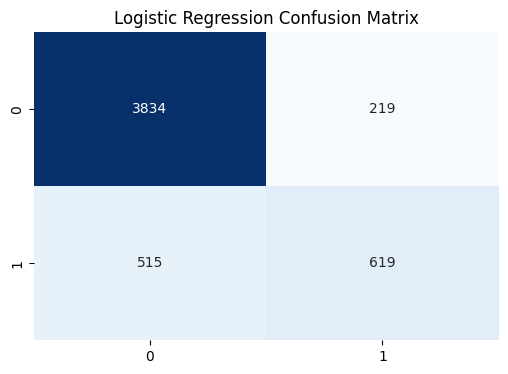

In [ ]:

best_lr_model = lr_grid_search.best_estimator_
lr_preds = best_lr_model.predict(X_test)

print("Logistic Regression Classification Report:\n", classification_report(y_test, lr_preds))

plt.figure(figsize=(6, 4))
sns.heatmap(confusion_matrix(y_test, lr_preds), annot=True, fmt='d', cmap='Blues', cbar=False)
plt.title("Logistic Regression Confusion Matrix")
plt.show()


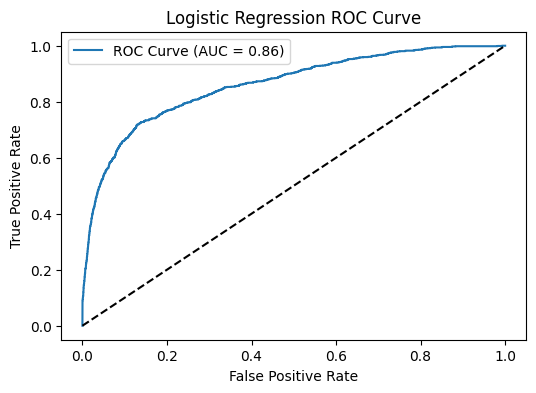

In [ ]:

lr_prob = best_lr_model.predict_proba(X_test)[:, 1]
fpr, tpr, _ = roc_curve(y_test, lr_prob)
auc = roc_auc_score(y_test, lr_prob)

plt.figure(figsize=(6, 4))
plt.plot(fpr, tpr, label=f'ROC Curve (AUC = {auc:.2f})')
plt.plot([0, 1], [0, 1], 'k--')
plt.title("Logistic Regression ROC Curve")
plt.xlabel("False Positive Rate")
plt.ylabel("True Positive Rate")
plt.legend()
plt.show()


#Finalise the LightGBM Model

In [ ]:

best_lgbm_model = lgbm_grid_search.best_estimator_
best_lgbm_model.fit(X, y)


[LightGBM] [Info] Number of positive: 5671, number of negative: 20261
[LightGBM] [Info] Auto-choosing row-wise multi-threading, the overhead of testing was 0.002941 seconds.
You can set `force_row_wise=true` to remove the overhead.
And if memory is not enough, you can set `force_col_wise=true`.
[LightGBM] [Info] Total Bins 1227
[LightGBM] [Info] Number of data points in the train set: 25932, number of used features: 27
[LightGBM] [Info] [binary:BoostFromScore]: pavg=0.218687 -> initscore=-1.273332
[LightGBM] [Info] Start training from score -1.273332


Pipeline(steps=[('preprocessor',
                 ColumnTransformer(transformers=[('num',
                                                  Pipeline(steps=[('imputer',
                                                                   SimpleImputer(strategy='median')),
                                                                  ('scaler',
                                                                   StandardScaler())]),
                                                  ['person_age',
                                                   'person_income',
                                                   'person_emp_length',
                                                   'loan_amnt', 'loan_int_rate',
                                                   'loan_percent_income',
                                                   'cb_person_cred_hist_length',
                                                   'income_to_loan_ratio']),
                                                 ('cat',
                                                  Pipeline(steps=[('imputer',
                                                                   SimpleImputer(strategy='most_frequent')),
                                                                  ('onehot',
                                                                   OneHotEncoder(handle_unknown='ignore'))]),
                                                  ['person_home_ownership',
                                                   'loan_intent', 'loan_grade',
                                                   'cb_person_default_on_file'])])),
                ('model',
                 LGBMClassifier(max_depth=15, n_estimators=200,
                                random_state=42))])

In [ ]:
import joblib

joblib.dump(best_lgbm_model, 'lightgbm_pipeline.joblib')
print("Model saved as lightgbm_pipeline.joblib")


Model saved as lightgbm_pipeline.joblib


In [ ]:
from sklearn.metrics import accuracy_score


accuracy = accuracy_score(y_test, predictions)
print(f"Accuracy on test data: {accuracy:.4f}")


Accuracy on test data: 0.9526


#finalise the Random Forest Model

In [ ]:
best_rf_model = rf_grid_search.best_estimator_
best_rf_model.fit(X, y)

Pipeline(steps=[('preprocessor',
                 ColumnTransformer(transformers=[('num',
                                                  Pipeline(steps=[('imputer',
                                                                   SimpleImputer(strategy='median')),
                                                                  ('scaler',
                                                                   StandardScaler())]),
                                                  ['person_age',
                                                   'person_income',
                                                   'person_emp_length',
                                                   'loan_amnt', 'loan_int_rate',
                                                   'loan_percent_income',
                                                   'cb_person_cred_hist_length',
                                                   'income_to_loan_ratio']),
                                                 ('cat',
                                                  Pipeline(steps=[('imputer',
                                                                   SimpleImputer(strategy='most_frequent')),
                                                                  ('onehot',
                                                                   OneHotEncoder(handle_unknown='ignore'))]),
                                                  ['person_home_ownership',
                                                   'loan_intent', 'loan_grade',
                                                   'cb_person_default_on_file'])])),
                ('model',
                 RandomForestClassifier(max_depth=20, min_samples_split=10,
                                        n_estimators=200, random_state=42))])

In [ ]:
import joblib

joblib.dump(best_rf_model, 'random_forest_pipeline.joblib')
print("Model saved as random_forest_pipeline.joblib")


Model saved as random_forest_pipeline.joblib


In [ ]:
rf_accuracy = accuracy_score(y_test, rf_predictions)
print(f"Accuracy on test data: {rf_accuracy:.4f}")


Accuracy on test data: 0.9464
